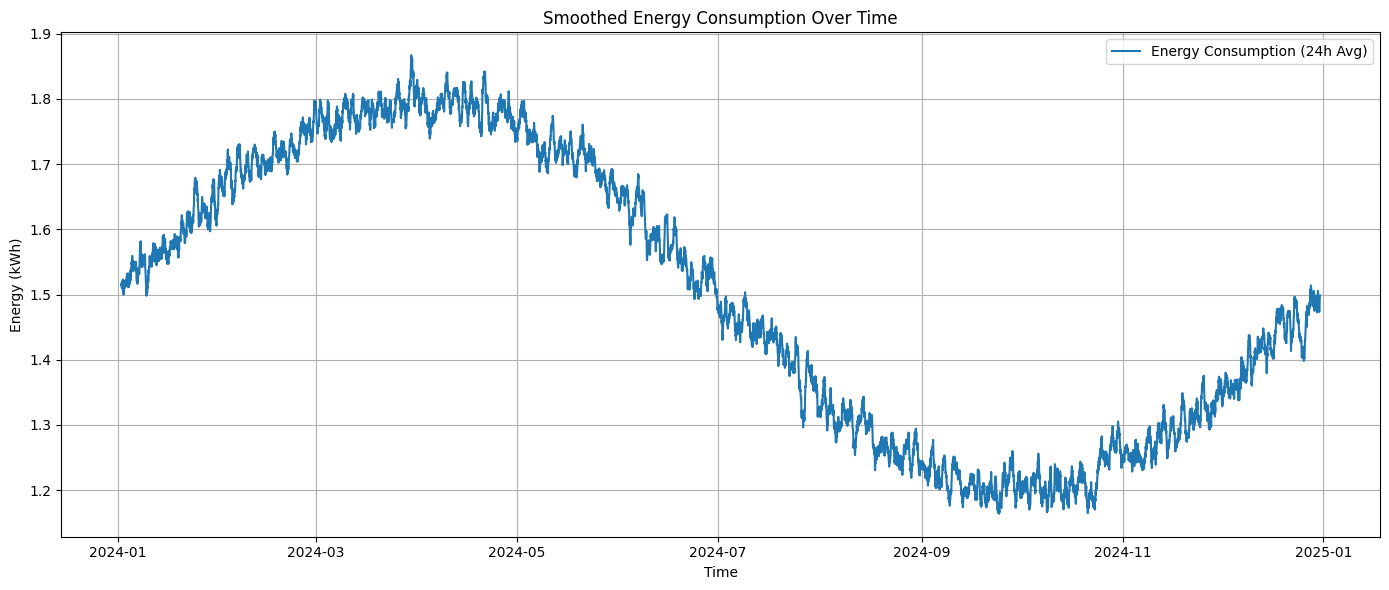

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../data/energy_consumption.csv', parse_dates=['timestamp'])

# Apply a 24-hour rolling average to smooth hourly data
df['energy_kwh_smooth'] = df['energy_kwh'].rolling(window=24).mean()

# Plot smoothed energy usage
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['energy_kwh_smooth'], label='Energy Consumption (24h Avg)', color='tab:blue')
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.title("Smoothed Energy Consumption Over Time")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [2]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

from data_preprocessing import preprocess_data

df_processed = preprocess_data(df)
print(df_processed.head())



             timestamp  energy_kwh  energy_kwh_smooth  hour  day_of_week  \
24 2024-01-02 00:00:00    1.536117           1.513511     0            1   
25 2024-01-02 01:00:00    1.690861           1.516710     1            1   
26 2024-01-02 02:00:00    1.736954           1.515960     2            1   
27 2024-01-02 03:00:00    1.709337           1.510428     3            1   
28 2024-01-02 04:00:00    2.004065           1.519779     4            1   

    is_weekend     lag_1    lag_24  rolling_mean_3  rolling_std_3  
24           0  1.303370  1.601242        1.396421       0.123185  
25           0  1.536117  1.614092        1.510116       0.195049  
26           0  1.690861  1.754952        1.654644       0.105203  
27           0  1.736954  1.842088        1.712384       0.023197  
28           0  1.709337  1.779661        1.816785       0.162776  


In [4]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

from train_model import train_model

df = pd.read_csv('../data/energy_consumption.csv', parse_dates=['timestamp'])
df_processed = preprocess_data(df)
train_model(df_processed)



X_train shape: (6988, 7)
y_train shape: (6988,)
First 5 y_train values:
 24    1.536117
25    1.690861
26    1.736954
27    1.709337
28    2.004065
Name: energy_kwh, dtype: float64
Test RMSE: 0.0499
Test R² Score: 0.9824
✅ Model saved to models/catboost_model.cbm


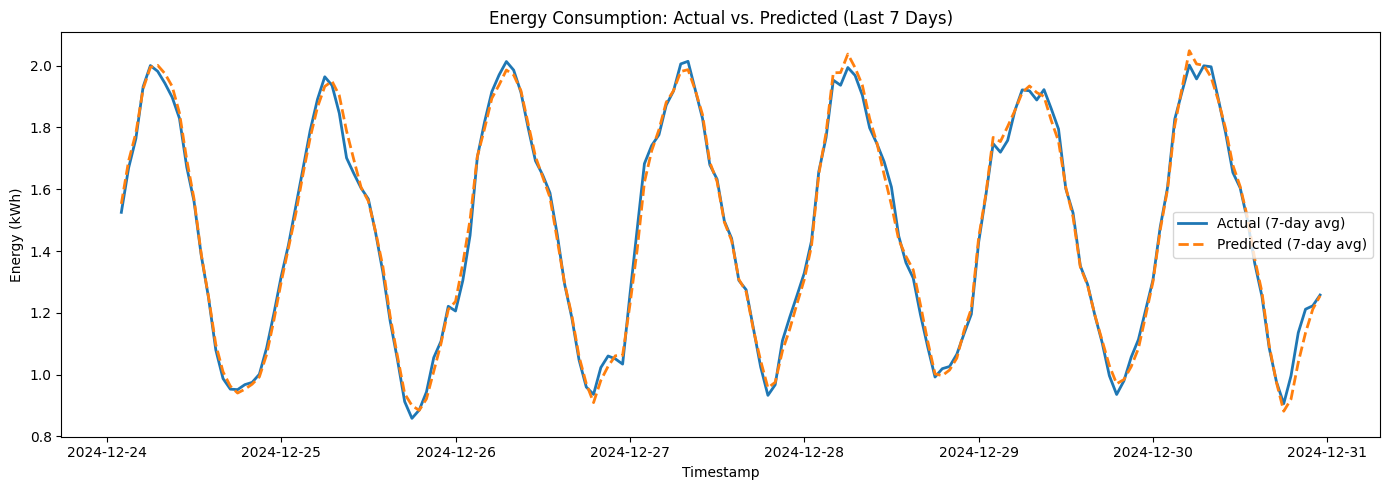

In [3]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

from predict import predict_and_plot
predict_and_plot(df_processed)


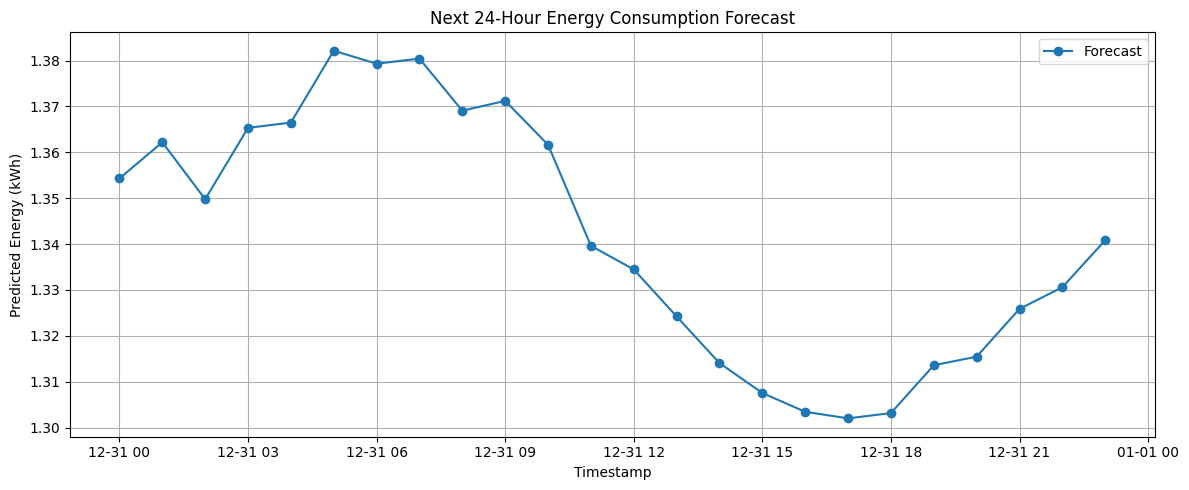

In [4]:
from predict import forecast_next_24_hours
forecast_df = forecast_next_24_hours(df_processed)


In [4]:
import pandas as pd
import numpy as np

# 1 year of hourly timestamps
date_range = pd.date_range(start='2024-01-01', periods=24*365, freq='H')

# Simulate daily + seasonal energy patterns with noise
base_usage = 1.5 + 0.5 * np.sin(2 * np.pi * date_range.hour / 24)  # daily pattern
seasonal = 0.3 * np.sin(2 * np.pi * date_range.dayofyear / 365.25)  # seasonal yearly
noise = 0.1 * np.random.randn(len(date_range))  # random noise
energy_kwh = base_usage + seasonal + noise

df = pd.DataFrame({
    'timestamp': date_range,
    'energy_kwh': energy_kwh
})

df.to_csv('../data/energy_consumption.csv', index=False)
print("✅ Saved synthetic dataset with", len(df), "rows.")


✅ Saved synthetic dataset with 8760 rows.


/var/folders/4m/6s2f5l3j7tlfgjrv3mskkqq00000gn/T/ipykernel_24077/3019791144.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='2024-01-01', periods=24*365, freq='H')
